In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import np_utils

from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D 
from keras.layers import ZeroPadding2D,Activation

from sklearn.metrics import classification_report

Using TensorFlow backend.
/home/dillon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dillon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dillon/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dillon/anaconda3/lib/python3.7/site-packages/tenso

# 讀入資料集

In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label)=cifar10.load_data()

In [3]:
x_train_image.shape

(50000, 32, 32, 3)

In [4]:
x_test_image.shape

(10000, 32, 32, 3)

In [5]:
y_train_label.shape

(50000, 1)

In [6]:
y_test_label.shape 

(10000, 1)

# 資料預處理

In [7]:
x_train_normalize=x_train_image.astype('float32')/255.0
x_test_normalize=x_test_image.astype('float32')/255.0

In [8]:
y_train_onehot=np_utils.to_categorical(y_train_label)
y_test_onehot=np_utils.to_categorical(y_test_label)

In [9]:
x_train=x_train_normalize[:40000]
x_valid=x_train_normalize[-10000:]
y_train=y_train_onehot[:40000]
y_valid=y_train_onehot[-10000:]

# CNN模型建立
# 建立兩層卷積 (丟棄 25% 神經元) + 池化層

In [10]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', input_shape=(32,32,3), activation='relu')) 
model.add(Dropout(0.25)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.25)) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))   
model.add(Dense(1024,activation='relu')) 
model.add(Dropout(0.25)) 
model.add(Dense(10,activation='softmax')) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)            

# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
my_cnn_model=model.fit(x=x_train, y=y_train, validation_data=(x_valid,y_valid), epochs=30, batch_size=128,verbose=1)


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 6s 138us/step - loss: 1.5229 - accuracy: 0.4530 - val_loss: 1.3107 - val_accuracy: 0.5621
Epoch 2/30
40000/40000 [==============================] - 4s 106us/step - loss: 1.1665 - accuracy: 0.5859 - val_loss: 1.1772 - val_accuracy: 0.6113
Epoch 3/30
40000/40000 [==============================] - 4s 106us/step - loss: 1.0153 - accuracy: 0.6415 - val_loss: 1.0568 - val_accuracy: 0.6556
Epoch 4/30
40000/40000 [==============================] - 4s 108us/step - loss: 0.9030 - accuracy: 0.6826 - val_loss: 0.9967 - val_accuracy: 0.6665
Epoch 5/30
40000/40000 [==============================] - 4s 109us/step - loss: 0.8250 - accuracy: 0.7103 - val_loss: 0.8944 - val_accuracy: 0.7045
Epoch 6/30
40000/40000 [==============================] - 4s 107us/step - loss: 0.7419 - accuracy: 0.7378 - val_loss: 0.9173 - val_accuracy: 0.7026
Epoch 7/30
40000/40000 [==============================] - 5s 

# 模型預測

In [12]:
scores=model.evaluate(x_test_normalize, y_test_onehot)
print("Accuracy=", scores[1])

10000/10000 [==============================] - 1s 59us/step
Accuracy= 0.7350000143051147


# 儲存模型

In [13]:
model.save('my_cnn_model.h5')

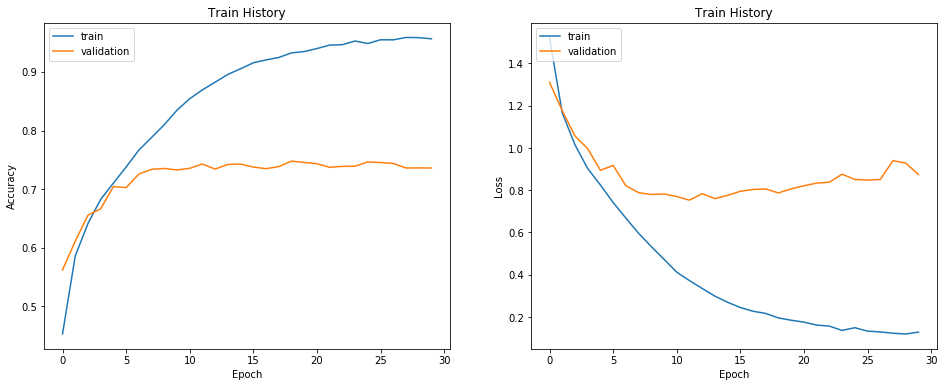

In [14]:
def show_train_history(train_history):
...     fig=plt.gcf()
...     fig.set_size_inches(16, 6)
...     plt.subplot(121)
...     plt.plot(train_history.history["accuracy"])
...     plt.plot(train_history.history["val_accuracy"])
...     plt.title("Train History")
...     plt.xlabel("Epoch")
...     plt.ylabel("Accuracy")
...     plt.legend(["train", "validation"], loc="upper left")
...     plt.subplot(122)
...     plt.plot(train_history.history["loss"])
...     plt.plot(train_history.history["val_loss"])
...     plt.title("Train History")
...     plt.xlabel("Epoch")
...     plt.ylabel("Loss")
...     plt.legend(["train", "validation"], loc="upper left")
...     plt.show()
show_train_history(my_cnn_model) 

In [15]:
prediction=model.predict_classes(x_test_normalize)
pd.crosstab(y_test_label.reshape(-1), prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,786,14,52,18,22,8,4,17,48,31
1,19,845,6,12,3,5,5,4,21,80
2,57,3,664,51,97,46,39,31,4,8
3,28,6,78,565,55,158,58,38,4,10
4,21,3,69,65,697,38,31,68,7,1
5,11,2,55,197,48,602,21,56,4,4
6,5,6,58,67,42,25,782,11,1,3
7,11,3,24,42,57,42,3,812,1,5
8,59,35,19,19,12,8,11,6,806,25


In [16]:
print(classification_report(y_test_label, prediction))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1000
           1       0.85      0.84      0.85      1000
           2       0.64      0.66      0.65      1000
           3       0.54      0.56      0.55      1000
           4       0.67      0.70      0.68      1000
           5       0.64      0.60      0.62      1000
           6       0.81      0.78      0.80      1000
           7       0.76      0.81      0.78      1000
           8       0.88      0.81      0.84      1000
           9       0.83      0.79      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.73      0.74     10000

